In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from functools import partial
from pyprojroot import here
from scipy.stats import bootstrap

%matplotlib inline

In [2]:
df = pd.read_csv(here('data/aita_w_gpt_w_mfd.csv'))

In [3]:
labels = ['NTA', 'YTA', 'NAH', 'ESH', 'INFO']
n_labels = len(labels)

In [4]:
df.columns

Index(['submission_id', 'title', 'selftext', 'created_utc', 'permalink',
       'score', 'flair_text', 'top_comment', 'true_label', 'gpt_dilemma',
       'gpt_label', 'gpt_reason', 'care_p', 'fairness_p', 'loyalty_p',
       'authority_p', 'sanctity_p', 'care_sent', 'fairness_sent',
       'loyalty_sent', 'authority_sent', 'sanctity_sent',
       'moral_nonmoral_ratio', 'f_var', 'sent_var'],
      dtype='object')

In [5]:
df.groupby('gpt_label')[['care_p', 'fairness_p', 'loyalty_p', 'authority_p', 'sanctity_p', 'f_var']].mean()

,care_p,fairness_p,loyalty_p,authority_p,sanctity_p,f_var
gpt_label,,,,,,
ESH,0.106847,0.097399,0.095191,0.087199,0.087277,0.000109
INFO,0.105617,0.097294,0.095852,0.086445,0.086594,0.000111
NAH,0.107061,0.098537,0.096209,0.087408,0.088055,0.000122
NTA,0.107410,0.098046,0.095901,0.087839,0.087984,0.000109
YTA,0.106212,0.096990,0.095332,0.086636,0.086891,0.000112


In [6]:
df.groupby('gpt_label')[['care_sent', 'fairness_sent', 'loyalty_sent', 'authority_sent', 'sanctity_sent']].mean()

,care_sent,fairness_sent,loyalty_sent,authority_sent,sanctity_sent
gpt_label,,,,,
ESH,-0.063148,-0.024993,0.008497,-0.010437,-0.053405
INFO,-0.053531,-0.013665,0.016281,-0.002970,-0.046645
NAH,-0.056991,-0.017082,0.014032,-0.004378,-0.045782
NTA,-0.057511,-0.020902,0.010903,-0.008582,-0.050131
YTA,-0.059937,-0.020676,0.013126,-0.006810,-0.050780


In [7]:
df['true_label']

0        NTA
1        NTA
2        NTA
3        NTA
4        NTA
        ... 
11350    NAH
11351    NTA
11352    NAH
11353    NTA
11354    ESH
Name: true_label, Length: 11355, dtype: object

In [8]:
df.groupby('true_label')[['care_p', 'fairness_p', 'loyalty_p', 'authority_p', 'sanctity_p']].mean()

,care_p,fairness_p,loyalty_p,authority_p,sanctity_p
true_label,,,,,
ESH,0.106646,0.096979,0.095467,0.087425,0.087729
INFO,0.107051,0.098917,0.096111,0.087913,0.088036
NAH,0.106223,0.096355,0.095210,0.085824,0.087566
NTA,0.107177,0.097982,0.095718,0.087569,0.087627
YTA,0.105931,0.096137,0.095333,0.086514,0.087000


In [9]:
from scipy.stats import mannwhitneyu

In [31]:
gpt_yta = df[(df['gpt_label'] == 'YTA')]
red_yta = df[(df['true_label'] == 'YTA')]
gpt_yta_red_not = df[(df['gpt_label'] == 'YTA') & (df['true_label'] != 'YTA')]
yta2yta = df[(df['true_label'] == 'YTA') & (df['gpt_label'] == 'YTA')]
yta2nta = df[(df['true_label'] == 'YTA') & (df['gpt_label'] == 'NTA')]
nta2yta = df[(df['true_label'] == 'NTA') & (df['gpt_label'] == 'YTA')]
nta2nta = df[(df['true_label'] == 'NTA') & (df['gpt_label'] == 'NTA')]

In [15]:
probs = ['care_p', 'fairness_p', 'loyalty_p', 'authority_p', 'sanctity_p']
labels = ['Care', 'Fairness', 'Loyalty', 'Authority', 'Sanctity']

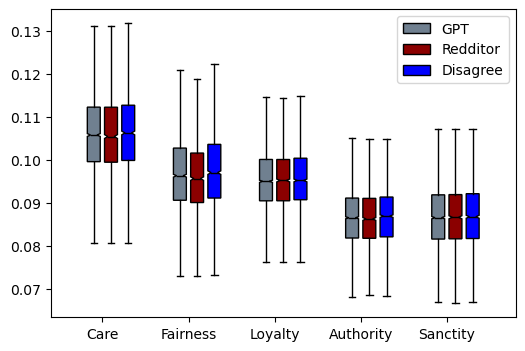

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

bp1 = ax.boxplot([gpt_yta[prob] for prob in probs],
           patch_artist=True,
           notch=True,
           widths=0.15,
           positions=[idx + 0.4 for idx in range(5)],
           boxprops={'facecolor': 'slategrey'},
           medianprops={'linewidth': 1, 'color': 'black'},
           showfliers=False)
bp2 = ax.boxplot([red_yta[prob] for prob in probs],
           patch_artist=True,
           notch=True,
           widths=0.15,
           positions=[idx + 0.6 for idx in range(5)],
           boxprops={'facecolor': 'darkred'},
           medianprops={'linewidth': 1, 'color': 'black'},
           showfliers=False)

bp3 = ax.boxplot([gpt_yta_red_not[prob] for prob in probs],
           patch_artist=True,
           notch=True,
           widths=0.15,
           positions=[idx + 0.8 for idx in range(5)],
           boxprops={'facecolor': 'blue'},
           medianprops={'linewidth': 1, 'color': 'black'},
           showfliers=False)

ax.set_xticks(0.5 + np.arange(5))
ax.set_xticklabels(labels)
ax.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0]],
          ['GPT', 'Redditor', 'Disagree'], loc='upper right')

In [35]:
[np.median(red_yta[prob]) - np.median(gpt_yta_red_not[prob]) for prob in probs]

[-0.0008347169437747937,
 -0.0013940893368823981,
 -6.170772379895939e-06,
 -0.0006643634368356938,
 -0.00011377903099669961]

In [34]:
[mannwhitneyu(red_yta[prob], gpt_yta_red_not[prob]) for prob in probs]

[MannwhitneyuResult(statistic=2147364.0, pvalue=0.009720963946168098),
 MannwhitneyuResult(statistic=2046254.0, pvalue=3.093510827968775e-07),
 MannwhitneyuResult(statistic=2211699.0, pvalue=0.3298166019512302),
 MannwhitneyuResult(statistic=2184791.0, pvalue=0.09928495422462359),
 MannwhitneyuResult(statistic=2233808.0, pvalue=0.6738893493357208)]

In [16]:
[mannwhitneyu(yta2yta[prob], yta2nta[prob]) for prob in probs]

[MannwhitneyuResult(statistic=188545.0, pvalue=0.00024187953405421445),
 MannwhitneyuResult(statistic=190146.0, pvalue=0.0005265253856754474),
 MannwhitneyuResult(statistic=195071.0, pvalue=0.0045129410707415475),
 MannwhitneyuResult(statistic=187475.0, pvalue=0.0001407031627776536),
 MannwhitneyuResult(statistic=188857.0, pvalue=0.00028233884020479645)]

In [23]:
[np.median(nta2yta[prob]) - np.median(nta2nta[prob]) for prob in probs]

[1        0.099312
 17       0.112538
 22       0.099814
 26       0.097881
 27       0.100526
            ...   
 11319    0.098943
 11322    0.109318
 11330    0.095059
 11331    0.128672
 11334    0.113521
 Name: care_p, Length: 1917, dtype: float64,
 1        0.089592
 17       0.100833
 22       0.081481
 26       0.092177
 27       0.097292
            ...   
 11319    0.088913
 11322    0.094845
 11330    0.106527
 11331    0.103636
 11334    0.111482
 Name: fairness_p, Length: 1917, dtype: float64,
 1        0.095133
 17       0.091593
 22       0.097616
 26       0.096960
 27       0.088977
            ...   
 11319    0.097493
 11322    0.090546
 11330    0.083533
 11331    0.102831
 11334    0.099302
 Name: loyalty_p, Length: 1917, dtype: float64,
 1        0.075890
 17       0.086603
 22       0.090916
 26       0.090584
 27       0.080984
            ...   
 11319    0.083585
 11322    0.074219
 11330    0.083270
 11331    0.092143
 11334    0.113953
 Name: authority_p, Le

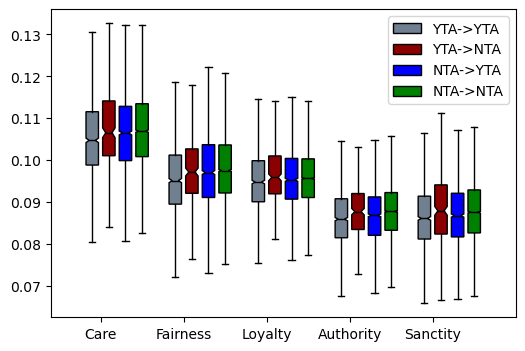

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

bp1 = ax.boxplot([yta2yta[prob] for prob in probs],
           patch_artist=True,
           notch=True,
           widths=0.15,
           positions=[idx + 0.4 for idx in range(5)],
           boxprops={'facecolor': 'slategrey'},
           medianprops={'linewidth': 1, 'color': 'black'},
           showfliers=False)
bp2 = ax.boxplot([yta2nta[prob] for prob in probs],
           patch_artist=True,
           notch=True,
           widths=0.15,
           positions=[idx + 0.6 for idx in range(5)],
           boxprops={'facecolor': 'darkred'},
           medianprops={'linewidth': 1, 'color': 'black'},
           showfliers=False)

bp3 = ax.boxplot([nta2yta[prob] for prob in probs],
           patch_artist=True,
           notch=True,
           widths=0.15,
           positions=[idx + 0.8 for idx in range(5)],
           boxprops={'facecolor': 'blue'},
           medianprops={'linewidth': 1, 'color': 'black'},
           showfliers=False)

bp4 = ax.boxplot([nta2nta[prob] for prob in probs],
           patch_artist=True,
           notch=True,
           widths=0.15,
           positions=[idx + 1.0 for idx in range(5)],
           boxprops={'facecolor': 'green'},
           medianprops={'linewidth': 1, 'color': 'black'},
           showfliers=False)
    
ax.set_xticks(0.5 + np.arange(5))
ax.set_xticklabels(labels)
ax.legend([bp1["boxes"][0], bp2["boxes"][0], bp3['boxes'][0], bp4['boxes'][0]],
          ['YTA->YTA', 'YTA->NTA', 'NTA->YTA', 'NTA->NTA'], loc='upper right')

In [80]:
[yta2yta[prob].mean() - yta2nta[prob].mean() for prob in probs]

[-0.0027599616147152978,
 -0.001856748542182679,
 -0.0013748734042169641,
 -0.001466645305282982,
 -0.002201892321230692]

(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  2.95857988,  6.50887574, 21.30177515, 37.86982249,
        46.15384615, 28.99408284, 19.52662722, 13.01775148,  4.14201183,
         2.36686391,  1.77514793,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ]),
 array([0.05      , 0.05541667, 0.06083333, 0.06625   , 0.07166667,
        0.07708333, 0.0825    , 0.08791667, 0.09333333, 0.09875   ,
        0.10416667, 0.10958333, 0.115     , 0.12041667, 0.12583333,
        0.13125   , 0.13666667, 0.14208333, 0.1475    , 0.15291667,
        0.15833333, 0.16375   , 0.16916667, 0.17458333, 0.18      ]),
 [<matplotlib.patches.Polygon at 0x7f402642f610>])

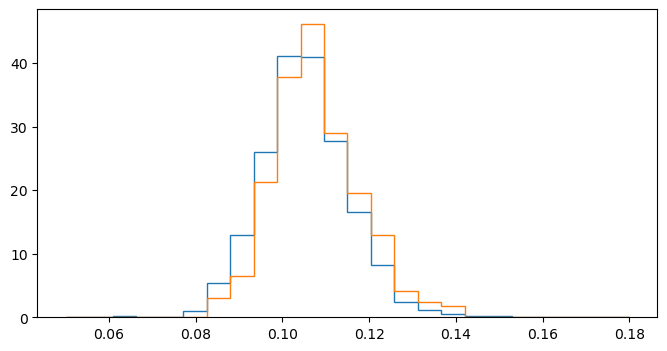

In [46]:
fig, axes = plt.subplots(5, 1, figsize=(10, 4))

for idx, (ax, prob, label) in enumerate(zip(axes, probs, labels)):
    ax.hist(yta2yta['care_p'],
            density=True,
            bins=np.linspace(0.05, 0.18, 25),
            histtype='step',
            label='YTA->YTA'
            )
    ax.hist(yta2nta['care_p'],
            density=True,
            bins=np.linspace(0.05, 0.18, 25),
            histtype='step',
            label=''

<Axes: >

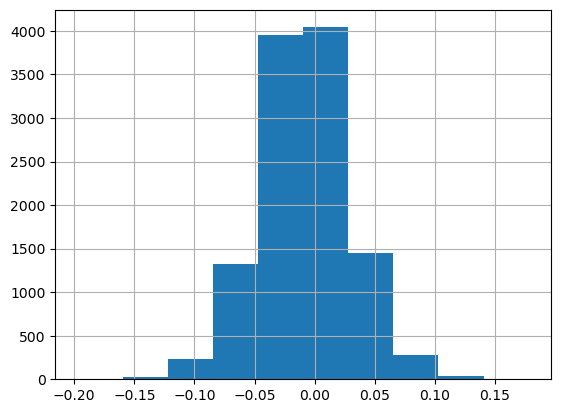

In [21]:
df['authority_sent'].hist()